In [1]:
import os
import cv2
import csv
import glob
import json
import pprint

import math
import numpy as np

import matplotlib.pyplot as plt

In [2]:
label_root = "/home/kunaldargan/ROBO_SURGERY/MaskRCNNData/GT_indicator/Experts_GT"

In [3]:
#FRAME NUMBER, NUMBER OF HITS, HIT INTENSITY, TUG, RING DROP, JERK, MOTiON SMOOTHNESS 

In [4]:
def process_input(input_file):
    next(input_file)
    high,low=0, 0;
    frame_number, hits, hit_intensity,tug_event, tug, ring_drop_event, jerk, motion_smoothness = 0,0,0,0,[],0,0,0;
    for row in input_file:
        frame_number = int(row["#"])
        hits = hits + int(row[" H"])
        
        if int(row[" H"]) and int(row[" HI"]):
            high = high+1
        elif int(row[" H"]) and not int(row[" HI"]):
            low = low+1
        
        tug.append(int(row[" T"]))
        
        ring_drop_event = ring_drop_event+int(row[" R"]) 
        jerk = jerk+int(row[" J"])
        
        if  int(row[" M"]) > motion_smoothness:
            motion_smoothness = int(row[" M"])
    
    tug.append(0) #end
    count=0; #000000111100000011000000111110000000
    f = 0
    total = 0
    
    for i in range(len(tug)):
        if tug[i]==1:
            count= count+1;

        if tug[i]==0 and count:
            total=total+count
            count = 0
            tug_event = tug_event +1

    if high > low:
        hit_intensity = 1
    else:
        hit_intensity = 0
    
    return(hits, hit_intensity,total,tug_event, ring_drop_event, jerk, motion_smoothness)
    

In [5]:
feature_dict= {}
for lbl_file in sorted(os.listdir(label_root)):
    print(lbl_file)
    ff = open(label_root+"/"+lbl_file)
    input_file = csv.DictReader(ff) # Ordered Dictionary
    NUMBER_OF_HITS, HIT_INTENSITY,TOTAL_FRAMES_IN_TUG, NUMBER_OF_TUG, NUMBER_OF_RINGDROP, NUMBER_OF_JERK, MOTION_SMOOTHNESS = process_input(input_file)

    filename = lbl_file.split("_GT")[0]
    feature_dict[filename] = [NUMBER_OF_HITS, HIT_INTENSITY, TOTAL_FRAMES_IN_TUG,NUMBER_OF_TUG, NUMBER_OF_RINGDROP, NUMBER_OF_JERK, MOTION_SMOOTHNESS]


E1_t10_GT.txt
E1_t11_GT.txt
E1_t12_GT.txt
E1_t1_GT.txt
E1_t2_GT.txt
E1_t3_GT.txt
E1_t4_GT.txt
E1_t5_GT.txt
E1_t6_GT.txt
E1_t7_GT.txt
E1_t8_GT.txt
E1_t9_GT.txt
E2_t10_GT.txt
E2_t11_GT.txt
E2_t12_GT.txt
E2_t1_GT.txt
E2_t2_GT.txt
E2_t3_GT.txt
E2_t4_GT.txt
E2_t5_GT.txt
E2_t6_GT.txt
E2_t7_GT.txt
E2_t8_GT.txt
E2_t9_GT.txt
E3_t10_GT.txt
E3_t11_GT.txt
E3_t12_GT.txt
E3_t1_GT.txt
E3_t2_GT.txt
E3_t3_GT.txt
E3_t4_GT.txt
E3_t5_GT.txt
E3_t6_GT.txt
E3_t7_GT.txt
E3_t8_GT.txt
E3_t9_GT.txt
E4_t10_GT.txt
E4_t11_GT.txt
E4_t12_GT.txt
E4_t1_GT.txt
E4_t2_GT.txt
E4_t3_GT.txt
E4_t4_GT.txt
E4_t5_GT.txt
E4_t6_GT.txt
E4_t7_GT.txt
E4_t8_GT.txt
E4_t9_GT.txt
E5_t10_GT.txt
E5_t11_GT.txt
E5_t12_GT.txt
E5_t1_GT.txt
E5_t2_GT.txt
E5_t3_GT.txt
E5_t4_GT.txt
E5_t5_GT.txt
E5_t6_GT.txt
E5_t7_GT.txt
E5_t8_GT.txt
E5_t9_GT.txt
E6_t10_GT.txt
E6_t11_GT.txt
E6_t12_GT.txt
E6_t1_GT.txt
E6_t2_GT.txt
E6_t3_GT.txt
E6_t4_GT.txt
E6_t5_GT.txt
E6_t6_GT.txt
E6_t7_GT.txt
E6_t8_GT.txt
E6_t9_GT.txt


In [6]:
feature_dict

{'E1_t10': [2, 0, 23, 2, 0, 0, 2],
 'E1_t11': [2, 0, 19, 1, 0, 0, 2],
 'E1_t12': [2, 0, 26, 3, 0, 0, 1],
 'E1_t1': [2, 1, 9, 1, 0, 6, 1],
 'E1_t2': [0, 0, 3, 1, 1, 0, 2],
 'E1_t3': [0, 0, 19, 2, 0, 3, 2],
 'E1_t4': [1, 0, 17, 1, 0, 5, 1],
 'E1_t5': [1, 0, 15, 1, 0, 3, 2],
 'E1_t6': [2, 0, 16, 1, 0, 0, 2],
 'E1_t7': [2, 1, 31, 1, 0, 0, 3],
 'E1_t8': [1, 0, 12, 3, 0, 0, 2],
 'E1_t9': [1, 0, 18, 1, 0, 0, 2],
 'E2_t10': [0, 0, 0, 0, 0, 0, 4],
 'E2_t11': [2, 0, 8, 1, 0, 0, 3],
 'E2_t12': [1, 1, 26, 3, 0, 0, 2],
 'E2_t1': [2, 0, 5, 1, 0, 0, 3],
 'E2_t2': [2, 0, 42, 2, 0, 0, 3],
 'E2_t3': [2, 0, 23, 1, 0, 0, 3],
 'E2_t4': [1, 0, 18, 3, 0, 0, 3],
 'E2_t5': [1, 0, 0, 0, 0, 0, 4],
 'E2_t6': [1, 0, 37, 2, 0, 0, 3],
 'E2_t7': [2, 0, 76, 4, 0, 0, 2],
 'E2_t8': [2, 0, 0, 0, 0, 0, 3],
 'E2_t9': [2, 0, 0, 0, 0, 0, 3],
 'E3_t10': [0, 0, 0, 0, 0, 0, 4],
 'E3_t11': [2, 0, 24, 2, 0, 0, 2],
 'E3_t12': [2, 0, 0, 0, 0, 0, 3],
 'E3_t1': [1, 0, 21, 1, 0, 0, 3],
 'E3_t2': [2, 0, 27, 1, 0, 0, 3],
 'E3_t3': [1, 0

In [7]:
# with open("features.csv", 'w', newline='') as csvfile:
#     wr = csv.writer(csvfile, quoting=csv.QUOTE_ALL)
#     wr.writerow(["VIDEO","NUMBER_OF_HITS", "HIT_INTENSITY", "TOTAL_FRAMES_IN_TUG","NUMBER_OF_TUG", "NUMBER_OF_RINGDROP", "NUMBER_OF_JERK_FRAMES", "MOTION_SMOOTHNESS"])
#     for key, val in feature_dict.items():
#         out_list = [key]+val
#         data[i]=out_list
#         i=i+1
#         wr.writerow(out_list)

In [8]:
## MIN MAX SCALLING
def normalize_2d(a):
    return((a - np.min(a))/np.max(a))

def std_normalize(a):
    return((a - np.mean(a))/np.std(a))

def variance(a):
    return np.var(a)
    

In [9]:
def diff2D(indata) :
    outdata=[]
    for i in range(len(indata)-1): #n-1 
            outdata.append((indata[i + 1][0] - indata[i][0], indata[i + 1][1] - indata[i][1])); 
                           
    return outdata



In [10]:
#find curvature
def find_curvature(dx, ddx): #2d vector
    curvature = []
    for i in range(len(dx)-1):
        dd = pow(dx[i][0] * dx[i][0] + dx[i][1] * dx[i][1], 1.5)
        
        if(dd != 0) :
            curvature.append(abs((dx[i][0] * ddx[i][0]) - (dx[i][1] * ddx[i][1])) / dd); 


    return curvature

In [11]:
#Arclength

def find_arc_length(dx):#2d vector
    arc_length = 0
    
    for i in range(len(dx)):
        arc_length = arc_length+ pow(dx[i][0] * dx[i][0] + dx[i][1] * dx[i][1], 0.5); 
        
    return arc_length;

In [12]:
def curvatureMaxnCount(curvature) :
    
    curvatureMax = 0; 
    curvatureMaxCount = 0; 
    
    if len(curvature) > 0:
        curvatureMax = curvature[0];

        for i in range(len(curvature)):

            if(abs(curvature[i]) > curvatureMax):
                curvatureMax = abs(curvature[i]); 

            if (abs(curvature[i]) > 300):
                curvatureMaxCount = curvatureMaxCount+1; 



    return(curvatureMax, curvatureMaxCount)

In [13]:
def mean2D(data) : #2d np array input
    
    sumX, sumY = 0, 0;
    meanX, meanY = 0, 0;
    
    if(len(data)):
        for i in range(len(data)):
            sumX = sumX + data[i][0];
            sumY = sumY + data[i][1];

        meanX = sumX / len(data)
        meanY = sumY / len(data)
    
    return (meanX, meanY)

def max2D(data):
    
    maxX, maxY = 0, 0;
    
    if(len(data)):

        maxX = data[0][0];
        maxY = data[0][1];
        
        for i in range(len(data)):
            if (abs(data[i][0]) > maxX):
                maxX = abs(data[i][0]);
        
            if (abs(data[i][1]) > maxY):
                maxY = abs(data[i][1]);
    
    return  maxX, maxY

_
def var2D(indata): #2d np array

    meanX,meanY = 0, 0; 
    sumX, sumY = 0, 0; 
   
    sz = len(indata) - 1; 

    if( sz > 0):
        meanX, meanY = mean2D(indata); 
        
        for i in range(sz):

            sumX = sumX+ (indata[i][0] - meanX) * (indata[i][0] - meanX); 
            sumY = sumY+ (indata[i][1] - meanY) * (indata[i][0] - meanY); 


        sumX = sumX / sz; 

        sumY = sumY / sz; 
    
    return sumX, sumY


In [14]:
#                             M = cv2.moments(np.array(cnt, dtype = np.int32))
#                             cX = int(M["m10"] / M["m00"])
#                             cY = int(M["m01"] / M["m00"])

In [15]:
def find_right_corner(bbox):
    bbox = sorted(bbox,key=lambda x: x[1])[2:]
    
    if bbox[0][0] > bbox[1][0]:
        right_corner = bbox[0]
    else:
        right_corner = bbox[1]
    
    return right_corner[0], right_corner[1]

E6_t1


NameError: name 'diff_data_dx' is not defined

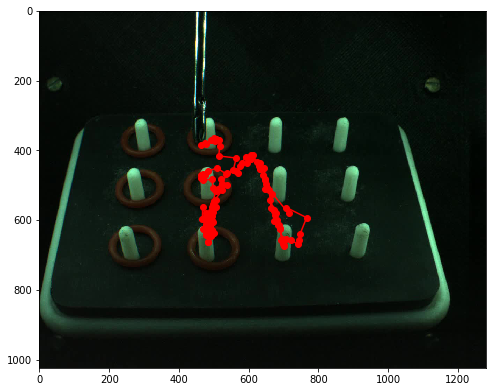

In [16]:
#CENTROID BASED TRACKING
dir_root = "/home/kunaldargan/ROBO_SURGERY/MaskRCNNData/data_maskrcnn_clips/"
dirs= ["E6"] #"E1","E2","E3","E4","E5",
data_tracking = {}
var_data = {}
var_data_x={}
var_data_y={}

for d in dirs:
    directory = os.path.join(dir_root,d)
    for folder in sorted(os.listdir(directory)):
        
        if ".avi" not in folder and ".xlsx" not in folder:
           
                root = os.path.join(dir_root+d,folder)
                lbl_files = sorted(glob.glob(root+"/*.json"))
                img_files = sorted(glob.glob(root+"/*.jpg"))
                shapes={}
                print(folder)
                for lbl_path in lbl_files:

                    ff = open(lbl_path)
                    data = json.load(ff)
                    img_path= root+"/"+data["imagePath"]


                    for s in data["shapes"]:
                        if s["label"] not in shapes.keys():
                            cnt = s["points"]
                            cnt = np.array(cnt, dtype = np.int32)
                            
                            rect = cv2.minAreaRect(cnt)
                            box = cv2.boxPoints(rect) # cv2.boxPoints(rect) for OpenCV 3.x
                            box = np.int0(box)
            
                            cX,cY = find_right_corner(box)
                                
                            shapes[s["label"]] = []
                            shapes[s["label"]].append((cX,cY))

                        else:
                            cnt = s["points"]
                            cnt = np.array(cnt, dtype = np.int32)

                            rect = cv2.minAreaRect(cnt)
                            box = cv2.boxPoints(rect) # cv2.boxPoints(rect) for OpenCV 3.x
                            box = np.int0(box)

                            cX,cY = find_right_corner(box)

                            shapes[s["label"]].append((cX,cY))

                centroids_tool= np.array(shapes["tool"], dtype = np.int32)
                X,Y = centroids_tool.T
                
                x_norm = normalize_2d(X)
                y_norm = normalize_2d(Y)
                
                centroids = np.array(list(zip(x_norm, y_norm)), dtype = np.float)


                im = plt.imread(img_files[0])
                plt.figure(figsize = (8,12))

                implot = plt.imshow(im)

                # put a red dot, size 40, at 2 locations:
                plt.plot(X,Y, 'o-', c='r')

                plt.savefig("/home/kunaldargan/ROBO_SURGERY/MaskRCNNData/"+folder+".jpg")
                
#                 print(diff_data_dx)
#                 print(np.split(diff_data_dx))
                
                var_dx, var_dy = var2D(diff_data_dx)
                
                std_xy = math.sqrt(var_dx+var_dy)
                print(std_xy)
                
                diff_data_dx = diff2D(centroids)
                diff_data_ddx = diff2D(diff_data_dx)

                curvature = find_curvature(diff_data_dx, diff_data_ddx)
                arc_length = find_arc_length(diff_data_dx)
                curvatureMax, curvatureMaxCount = curvatureMaxnCount(curvature)
                
                
                
                
                mean_x = np.mean(x_norm)
                mean_y = np.mean(y_norm)
                var_x = np.var(x_norm)
                var_y = np.var(y_norm)

                feature_dict[folder]= feature_dict[folder]+[arc_length,np.mean(curvature),curvatureMax,curvatureMaxCount,mean_x, mean_y, var_x,var_y ]

                var_data[folder] = std_xy
                var_data_x[folder] = var_dx
                var_data_y[folder] = var_dy




In [ ]:
plt.figure(figsize=(15,5))
plt.bar(var_data.keys(), var_data.values(), color='g')           

<BarContainer object of 12 artists>

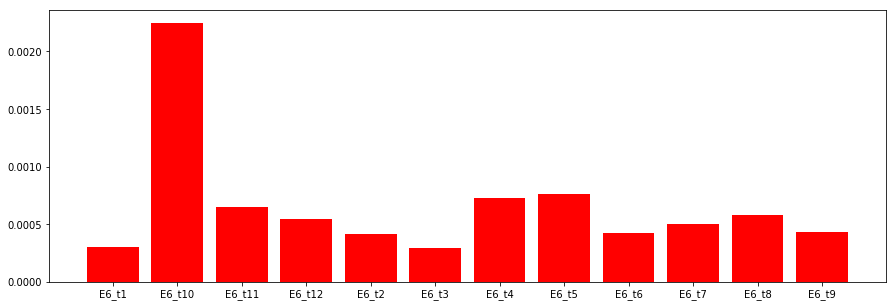

In [80]:
plt.figure(figsize=(15,5))
plt.bar(var_data_x.keys(), var_data_x.values(), color='r')           

<BarContainer object of 12 artists>

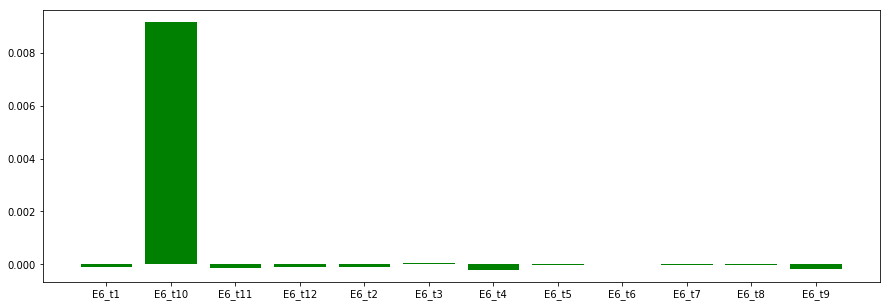

In [81]:
plt.figure(figsize=(15,5))
plt.bar(var_data_y.keys(), var_data_y.values(), color='g')           

In [17]:
i=0
with open("features.csv", 'w', newline='') as csvfile:
    wr = csv.writer(csvfile, quoting=csv.QUOTE_ALL)
    wr.writerow(["VIDEO","NUMBER_OF_HITS", "HIT_INTENSITY", "TOTAL_FRAMES_IN_TUG","NUMBER_OF_TUG", "NUMBER_OF_RINGDROP", "NUMBER_OF_JERK_FRAMES", "MOTION_SMOOTHNESS","ARC_LENGTH","MEAN_CURVATURE","MAX_CURVATURE", "CURVATURE_MAX_COUNT", "MEAN_X", "MEAN_Y", "VARIANCE_X", "VARIANCE_Y"])
    for key, val in feature_dict.items():
        out_list = [key]+val
        data[i]=out_list
        i=i+1
        wr.writerow(out_list)

In [18]:
feature_dict

{'E1_t10': [2,
  0,
  23,
  2,
  0,
  0,
  2,
  1344.083181668208,
  0.39915524385686135,
  16.0,
  0,
  579.9833333333333,
  190.6,
  36306.616388888884,
  1594.2733333333335],
 'E1_t11': [2,
  0,
  19,
  1,
  0,
  0,
  2,
  1257.6594567940465,
  0.11158258382566931,
  2.2097086912079607,
  0,
  581.4615384615385,
  192.46153846153845,
  4598.463905325444,
  6026.371597633137],
 'E1_t12': [2,
  0,
  26,
  3,
  0,
  0,
  1,
  1632.7656760141651,
  0.2893934008634013,
  15.0,
  0,
  651.7904761904762,
  200.4,
  31997.02276643991,
  7152.868571428572],
 'E1_t1': [2,
  1,
  9,
  1,
  0,
  6,
  1,
  2071.0676347895323,
  0.40120142163538164,
  10.0,
  0,
  612.5930232558139,
  247.69767441860466,
  9214.26460248783,
  3312.9318550567873],
 'E1_t2': [0,
  0,
  3,
  1,
  1,
  0,
  2,
  1000.8065612112849,
  0.23743233750779616,
  3.8890872965260113,
  0,
  634.8545454545455,
  186.65454545454546,
  30351.687933884295,
  4011.6079338842983],
 'E1_t3': [0,
  0,
  19,
  2,
  0,
  3,
  2,
  101

In [181]:
shapes.keys()

dict_keys(['disk0', 'disk1', 'disk2', 'disk3', 'disk4', 'disk5', 'tool'])

In [182]:
centroids_tool= np.array(shapes["tool"])

In [183]:
x,y = centroids_tool.T

In [184]:
for z in zip(x,y):
    print(z)

(332, 320)
(328, 327)
(326, 325)
(329, 296)
(327, 300)
(325, 298)
(348, 277)
(353, 282)
(363, 263)
(368, 254)
(387, 223)
(458, 229)
(507, 218)
(528, 212)
(515, 213)
(512, 204)
(513, 227)
(526, 229)
(540, 207)
(584, 172)
(600, 168)
(645, 157)
(661, 152)
(666, 137)
(672, 99)
(693, 115)
(706, 110)
(719, 99)
(730, 106)
(739, 108)
(746, 113)
(752, 111)
(759, 110)
(764, 107)
(770, 114)
(778, 122)
(778, 134)
(780, 138)
(781, 145)
(782, 166)
(784, 204)
(774, 176)
(777, 187)
(780, 178)
(790, 174)
(793, 153)
(796, 158)
(797, 162)
(802, 171)
(803, 173)
(806, 180)
(814, 215)
(809, 191)
(807, 197)
(795, 160)


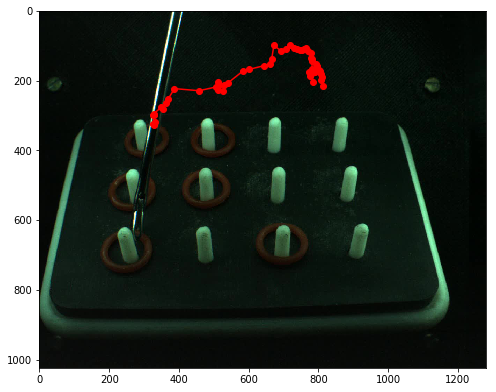

In [185]:
im = plt.imread(img_files[0])
plt.figure(figsize = (8,12))

implot = plt.imshow(im)

# put a red dot, size 40, at 2 locations:
plt.plot(x,y, 'o-', c='r')

plt.show()

In [187]:
mean_x, mean_y

(634.8545454545455, 186.65454545454546)

In [188]:
max_x = np.max(x)
max_y = np.max(y)

In [189]:
max_x,max_y

(814, 327)

In [186]:
# mean_x = np.mean(x)
# mean_y = np.mean(y)

In [115]:
double varX = 0; 

double varY = 0; 

double arcLength = 0; 

double curvatureMax = 0; 

int curvatureMaxCount = 0; 

vector<pair <double, double > > x; 

vector<pair <double, double > > dx; 

vector<pair <double, double > > ddx; 

vector<double> Curvature; 

 vector<pair <double, double > > data = result.grasping.trackingData[i].second; 

qDebug() << " grasping normalize enter\n"; 

util::normalize2D(data, x); 

qDebug() << " data size \n" << data.size(); 

qDebug() << " x normalized data \n" << x.size(); 

for(int i = 0; i < x.size(); i++) 

{ 

      qDebug() << "x[i] - " << x[i] << endl; 

} 

qDebug() << " grasping diff2d enter 1\n"; 

 util::diff2D(x, dx); 

qDebug() << "grasping diff2d enter 2\n"; 

util::diff2D(dx, ddx); 

qDebug() << " grasping var2d enter 1\n"; 

util::var2D(dx, &varX, &varY); 

qDebug() << "grasping curvature enter 1\n"; 

util::curvature(dx, ddx, Curvature); 

qDebug() << "grasping curvature max count enter\n"; 

 util::curvatureMaxnCount(Curvature, &curvatureMax, &curvatureMaxCount); 

qDebug() << "grasping arclength enter\n"; 

util::arclength(dx, &arcLength); 

result.grasping.curvatureMax.push_back(make_pair(result.grasping.trackingData[i].first, curvatureMax)); 

result.grasping.arcLength.push_back(make_pair(result.grasping.trackingData[i].first, arcLength)); 

result.grasping.curvatureMaxCount.push_back(make_pair(result.grasping.trackingData[i].first, curvatureMaxCount)); 



_________________________________________________________________________________ 

void util::normalize2D(const vector<pair <double, double > > &indata, vector<pair <double, double > > &outdata) 

{ 

    double meanX = 0; double meanY = 0; 

    double maxX = 0; double maxY = 0; 

    mean2D(indata, &meanX, &meanY); 

    outdata.clear(); 

    if(indata.size()) 

    { 

        for (int i = 0; i < indata.size(); ++i) 

        { 

            outdata.push_back(make_pair(indata[i].first - meanX, indata[i].second - meanY)); 

        } 

        max2D(outdata, &maxX, &maxY); 

        for (int i = 0; i < outdata.size(); ++i) 

        { 

            if(maxX != 0 && maxY != 0) 

            { 

                outdata[i].first = (outdata[i].first) / maxX; 

                outdata[i].second = (outdata[i].second) / maxY; 

            } 

        } 

    } 

} 

 _________________________________________________________________________________ 

void util::diff2D(const vector<pair <double, double > > &indata, vector<pair <double, double > > &outdata) 

{ 

    outdata.clear(); 

    int sz = ((int)indata.size())-1; 

    if( sz > 0) 

    { 

        for (int i = 0; i < sz ; ++i) 

        { 

            outdata.push_back(make_pair(indata[i + 1].first - indata[i].first, indata[i + 1].second - indata[i].second)); 

        } 

    } 

} 

 _______________________________________________________________________________ 

void util::var2D(const vector<pair <double, double > > &indata, double *varX, double *varY) 

{ 

    int sz = ((int)indata.size()) - 1; 

    if( sz > 0) 

    { 

        double meanX = 0; double meanY = 0; 

        double sumX = 0; double sumY = 0; 

        mean2D(indata, &meanX, &meanY); 

        for (int i = 0; i < sz ; ++i) 

        { 

            sumX += (indata[i].first - meanX) * (indata[i].first - meanX); 

            sumY += (indata[i].second - meanY) * (indata[i].second - meanY); 

        } 

        sumX /= indata.size() - 1; 

        sumY /= indata.size() - 1; 

    } 

} 

_________________________________________________________________________________ 

void util::curvature(const vector<pair <double, double > > &dx, 

    const vector<pair <double, double > > &ddx, 

    vector<double> &curvature) 

{ 

    curvature.clear(); 

    if(ddx.size()) 

    { 

        for (int i = 0; i < ddx.size(); ++i) 

        { 

            double dd = pow(dx[i].first * dx[i].first + dx[i].second * dx[i].second, 1.5); 

            if(dd != 0) 

            { 

                curvature.push_back(abs((dx[i].first * ddx[i].second) - (dx[i].second * ddx[i].first)) / dd); 

            } 

        } 

    } 

} 

_________________________________________________________________________________  

void util::arclength(const vector<pair <double, double > > &dx, double *arcLength) 

{ 

    if(dx.size()) 

    { 

        *arcLength = 0; 

        for (int i = 0; i < dx.size(); ++i) 

        { 

            *arcLength += pow(dx[i].first * dx[i].first + dx[i].second * dx[i].second, 0.5); 

        } 

    } 

} 

_____________________________________________________________________________ 

void util::curvatureMaxnCount(const vector<double > &curvature, double *curvatureMax, int*curvatureMaxCount) 

{ 

    if (curvature.size()) 

    { 

        *curvatureMax = curvature[0]; 

        for (int i = 1; i < curvature.size(); ++i) 

        { 

            if (abs(curvature[i]) > *curvatureMax) 

            { 

                *curvatureMax = abs(curvature[i]); 

            } 

            if (abs(curvature[i]) > 300) 

            { 

                *curvatureMaxCount++; 

            } 

        } 

    } 

    else 

    { 

        *curvatureMax = 0; 

        *curvatureMaxCount = 0; 

    } 

} 


SyntaxError: invalid syntax (<ipython-input-115-21fb722a18f5>, line 1)

In [61]:
tug = [0,0,0,0,0,0,0,0,1,1,1,1,1,1,0,0,0,0,0,1,1,1,1,0,0,0,0,0,1,1,0,1,1,1,1,1,1]
tug_event=0
count=0; #000000111100000011000000111110000000
tug.append(0)
total = 0
for i in range(len(tug)):
    if tug[i]==1:
        count= count+1;

    if tug[i]==0 and count:
        total=total+count
        count = 0
        tug_event = tug_event +1

In [62]:
tug_event

4

In [63]:
total

18